In [1]:
from sympy import * # 导入 sympy 中的所有功能
init_printing(use_latex=True) 
from IPython.display import display # 显示公式
import matplotlib.pyplot as plt
%matplotlib inline

# 简介

方程类型:
$$y^\prime = f(x,y), \quad F(x, y, y^\prime)=0$$

**初等积分法:** 通过积分求解常微分方程的一种方法, 其特点是微分方程的解可以用初等函数及初等函数的积分形式来表示.

## 2.1 变量分离方程与变量变换

### 1. 变量分离方程

$$ 
\frac{dy}{dx}=f(x)\varphi(y) 
$$

其中 $f(x)$, $g(y)$ 分别是 $x$ 和 $y$ 的已知连续函数.

**例** 
$$\frac{dy}{dx}=-\frac{x}{y}, \quad R^\prime = kR $$

**解法步骤** 设 $\varphi(y)\not=0$
1. 分离变量 $$\frac{dy}{\varphi(y)}=f(x)dx$$
1. 两边积分 $$\int\frac{dy}{\varphi(y)}=\int f(x)dx$$
1. 设 $G(y)=\int\frac{dy}{\varphi(y)}$, $F(x)=\int f(x)dx$, 可得方程通解 $$G(y)=F(x)+C$$

**易验证上述解为通解**.

如果存在 $y_i$, 使得 $\varphi(y_i)=0, i = 1, 2, \cdots,k$, 则 $y=y_i$ 是方程的常数解.

最终方程的解为
$$
\begin{cases}
G(y)=F(x)+C\\
y=y_i, i = 1, 2, \cdots, k
\end{cases}
$$

**例 1** 求解方程 $\frac{dy}{dx}=-\frac{x}{y}$

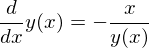

In [2]:
x = Symbol('x')
y = Function('y')
eq = Eq(y(x).diff(x), -x/y(x))
display(eq)

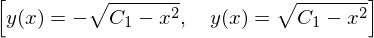

In [3]:
s = dsolve(eq, y(x))
display(s)

**例 2** 求解方程 $\frac{dy}{dx}=y^2\cos x$

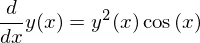

In [2]:
x = Symbol('x')
y = Function('y')
eq = Eq(y(x).diff(x), y(x)**2*cos(x))
display(eq)

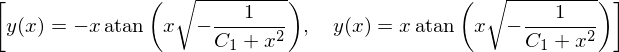

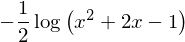

In [7]:
s = dsolve(eq, y(x))
display(s)

integrate((1+x)/(1- 2*x -x**2), x)

### 2. 可化成变量分离方程的类型

**(1) 齐次方程** 

形如 
$$
\frac{\mathrm d y}{\mathrm d x} = g(\frac{y}{x})
$$
的方程, 称为**齐次微分方程**, $g(u)$ 是 $u$ 的连续函数.

若函数 $f(x, y)$ 满足下式
$$
f(kx,ky) = k^nf(x,y)
$$
其中 $n$ 是整数, 则称 $f(x,y)$ 为 **$n$ 次齐次函数**.

**解法**
1. 作变量变换 $\frac{y}{x} = u$ 即 $$y=ux$$.
1. 两边关于 $x$ 求导 $$\frac{\mathrm d y}{\mathrm d x}=x\frac{\mathrm d u}{\mathrm d x}+u$$
1. 将上式代入原方程, 得 $$x\frac{\mathrm d u}{\mathrm d x}+u = g(u)$$ $$\frac{\mathrm d u}{\mathrm d x} = \frac{g(u)-u}{x}$$
1. 求解得通解: $u=\varphi(x,c)$ 或 $\Phi(u, x, c) = 0$ 
1. 原方程通解为 $ y=x\varphi(x,c)$ 或 $ \Phi(\frac{y}{x}, x, c)=0$

**练习：**

（1） $$\frac{\mathrm d y}{\mathrm d x}=\frac{y}{x}+\tan \frac{y}{x}$$

**解：** 假设 $ y  = xu$ 则有 
$$
\frac{\mathrm d y}{\mathrm d x} = x \frac{\mathrm d u}{\mathrm d x} + u
$$

$$
x \frac{\mathrm d u}{\mathrm d x} + u = u + \tan u
$$

$$
\frac{\mathrm d u}{\mathrm d x} = \frac{\tan u}{x}
$$

设 $ \tan u \not= 0$, 

$$
\cot u \mathrm d u = \frac{\mathrm d x}{x}
$$

两边积分可得：

$$
\ln |\sin u| = \ln |x| + c_1 
$$

$$
\sin u = \pm e^{c_1}x
$$

$$
\sin u = cx
$$

方程还有解 
$$
\tan u = 0 \text{ 即 } \sin u = 0.
$$

原方程解为：

$$
\sin\frac{y}{x} = c x
$$

**(2) 可化为齐次方程的方程类型**

形如
$$
\frac{\mathrm d y}{\mathrm d x} = \frac{a_1x + b_1y+c_1}{a_2x+b_2y+c_2}
$$
方程, 其中 $a_1, a_2, b_1, b_2, c_1, c_2$ 均为常数.

* $\frac{a_1}{a_2}=\frac{b_1}{b_2}=\frac{c_1}{c_2}=k$

$$ \frac{\mathrm d y}{\mathrm d x} = k$$

*  $\frac{a_1}{a_2}=\frac{b_1}{b_2}=k\not=\frac{c_1}{c_2}$

令 $ u = a_2x + b_2 y$ , 则

$$
\frac{\mathrm d u}{\mathrm d x} = a_2 + b_2 \frac{\mathrm d y}{\mathrm d x} = a_2 + b_2 \frac{ku + c_1}{u + c_2}
$$

* $\frac{a_1}{a_2}\not=\frac{b_1}{b_2}$

线性方程组

$$
\begin{cases}
a_1x + b_1y+c_1 = 0\\
a_2x+b_2y+c_2 = 0
\end{cases}
$$

存在解 $(\alpha, \beta)$. 

令 
$$
\begin{cases}
X = x - \alpha\\
Y = y - \beta
\end{cases}
$$

则原方程化为

$$
\frac{\mathrm d Y}{\mathrm d X} = \frac{a_1X + b_1Y}{a_2X+b_2Y}
$$

**注**:  同样的方法和步骤可解如下更一般的方程类型
$$\frac{\mathrm d y}{\mathrm d x} = f(\frac{a_1x + b_1y+c_1}{a_2x+b_2y+c_2})$$

**练习：**

（1） 求方程 $$ \frac{\mathrm d y}{\mathrm d x} = \frac{x-y+1}{x+y-3}$$ 的通解。

**解：**  解方程组
$$
\begin{cases}
x-y+1 = 0,\\
x+y-3 = 0,
\end{cases}
$$

可得 $ x = 1$, $y = 2$. 做变换
$$
\begin{cases}
x = X + 1\\
y = Y + 2
\end{cases}
$$

代入原方程， 可得：

$$
\frac{\mathrm d Y}{\mathrm d X} = \frac{X-Y}{X+Y}
$$

令 $ u = \frac{Y}{X} $, 即 $ Y = u X$, 可得

$$
\frac{\mathrm d X}{X} = \frac{1 + u }{1 - 2u - u^2}\mathrm d u
$$

$$
\ln |X| = - \frac{1}{2}\ln |u^2 + 2u - 1| + c_1
$$

$$
\ln X^2 = - \ln |u^2 + 2u - 1| + c_2
$$

可得：

$$
X^2(u^2 + 2u - 1) = \pm e^{c_2}
$$

代入 $ u = \frac{Y}{X} $， 可得：

$$
Y^2 + 2XY - X^2 = c_3
$$

**注：** 上述的方法可以用到更多类型的方程上去， 如：

（1） $$ \frac{\mathrm d y}{\mathrm d x} = f(ax + by + c)\rightarrow u = ax+by+c$$

（2） $$ yf(xy)\mathrm d x + x g(xy)\mathrm d y = 0\rightarrow u = xy$$

（3） $$ x^2 \frac{\mathrm d y}{\mathrm d x} = f(xy)\rightarrow u = xy $$

（4） $$ \frac{\mathrm d y}{\mathrm d x} = x f(\frac{y}{x^2})\rightarrow u = \frac{y}{x^2} $$